Testing Branch

# Business Statement

- Problem solved
    - Hypothesis: non-fraud behavior does not change across time (data has consistent spacial & temporal features)
        - Consistency score as a feature?
 
- Prediction of fraud + the reason for fraud
    - Traditional models (interpretability) vs black-box models

- Current Challenges


# EDA (Data Understanding):

In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [14]:
cc_fraud = pd.read_csv('files/creditcard.csv')
cc_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
transactions = pd.read_csv('files/cc_transactions.csv')
transactions.head()

,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TERMINAL_ID,AMOUNT,TIME_SECONDS,TIME_DAYS,FRAUD,FRAUD_SCENARIO,DURING_WEEKEND,DURING_NIGHT
0,0,2023-05-01 00:00:31,596,3156,110.04,31,0,0,0,0,1
1,1,2023-05-01 00:02:10,4961,3412,162.29,130,0,0,0,0,1
2,2,2023-05-01 00:04:18,1615,5926,48.22,258,0,0,0,0,1
3,3,2023-05-01 00:06:20,4459,8746,45.40,380,0,0,0,0,1
4,4,2023-05-01 00:06:47,3922,3649,149.94,407,0,0,0,0,1


In [16]:
baf_base = pd.read_csv('files/Base.csv')
baf_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [21]:
baf_base.corr(numeric_only = "TRUE")

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
fraud_bool,1.000000,0.045079,-0.036720,-0.026031,0.033701,0.062959,0.000567,-0.024524,0.005212,-0.016892,...,-0.013180,-0.003222,-0.035156,0.068907,0.016885,0.008999,-0.050296,0.035704,NaN,0.013250
income,0.045079,1.000000,-0.038519,0.018209,-0.036985,0.125822,-0.015877,0.059046,-0.080581,-0.096431,...,0.014979,-0.004514,0.086861,0.108868,0.011452,-0.055430,-0.043584,-0.009992,NaN,0.116479
name_email_similarity,-0.036720,-0.038519,1.000000,-0.018186,0.050305,-0.048902,-0.007736,0.029040,0.025114,0.024881,...,0.008966,-0.006351,0.011021,0.073159,-0.015224,0.005998,0.014342,-0.017804,NaN,-0.042949
prev_address_months_count,-0.026031,0.018209,-0.018186,1.000000,-0.271730,-0.069178,0.078107,-0.009428,-0.029638,-0.001265,...,0.004757,-0.045550,-0.042949,-0.028474,0.019242,0.051425,0.031672,0.011924,NaN,-0.001793
current_address_months_count,0.033701,-0.036985,0.050305,-0.271730,1.000000,0.142863,-0.057836,0.057601,0.047286,0.027508,...,-0.088268,0.071997,0.060732,0.130594,-0.012355,-0.033574,-0.050539,-0.000760,NaN,-0.024541
customer_age,0.062959,0.125822,-0.048902,-0.069178,0.142863,1.000000,-0.035999,-0.013000,-0.014176,-0.022063,...,-0.147098,0.012907,0.108743,0.148857,-0.001606,0.025049,-0.024272,0.025709,NaN,0.005694
days_since_request,0.000567,-0.015877,-0.007736,0.078107,-0.057836,-0.035999,1.000000,0.019782,0.000249,0.027968,...,0.005130,-0.027460,-0.048861,-0.068670,0.001066,0.049613,0.000337,0.009025,NaN,-0.017938
intended_balcon_amount,-0.024524,0.059046,0.029040,-0.009428,0.057601,-0.013000,0.019782,1.000000,0.002251,0.042849,...,0.038625,0.178374,0.096676,0.057860,0.007933,0.022811,-0.020689,-0.019910,NaN,-0.043070
zip_count_4w,0.005212,-0.080581,0.025114,-0.029638,0.047286,-0.014176,0.000249,0.002251,1.000000,0.142372,...,0.012122,0.053637,-0.015015,-0.011651,0.017212,0.039687,0.022283,0.020550,NaN,-0.287203
velocity_6h,-0.016892,-0.096431,0.024881,-0.001265,0.027508,-0.022063,0.027968,0.042849,0.142372,1.000000,...,-0.010751,0.014874,-0.007049,-0.025005,-0.000450,0.054491,0.002797,0.030030,NaN,-0.409148


In [6]:
baf_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157645 entries, 0 to 2157644
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TRANSACTION_ID  int64  
 1   DATETIME        object 
 2   CUSTOMER_ID     int64  
 3   TERMINAL_ID     int64  
 4   AMOUNT          float64
 5   TIME_SECONDS    int64  
 6   TIME_DAYS       int64  
 7   FRAUD           int64  
 8   FRAUD_SCENARIO  int64  
 9   DURING_WEEKEND  int64  
 10  DURING_NIGHT    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 181.1+ MB


In [9]:
'''
target = transactions['FRAUD']
features = transactions[['AMOUNT', 'TIME_SECONDS', 'DURING_WEEKEND']]
print(target.describe())
features.describe()
'''

count    2.157645e+06
mean     8.275226e-03
std      9.059112e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: FRAUD, dtype: float64


,AMOUNT,TIME_SECONDS,DURING_WEEKEND
count,2.157645e+06,2.157645e+06,2.157645e+06
mean,1.069681e+02,7.779290e+06,2.777760e-01
std,1.371379e+02,4.491976e+06,4.479024e-01
min,0.000000e+00,3.100000e+01,0.000000e+00
25%,3.868000e+01,3.889607e+06,0.000000e+00
50%,8.647000e+01,7.781949e+06,0.000000e+00
75%,1.517900e+02,1.168412e+07,1.000000e+00
max,2.623750e+04,1.555197e+07,1.000000e+00


In [23]:
'''
plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(transactions[col], target, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('FRAUD')
    plt.tight_layout()
'''

"\nplt.figure(figsize=(20, 5))\nfor i, col in enumerate(features.columns):\n    plt.subplot(1, 3, i+1)\n    plt.plot(transactions[col], target, 'o')\n    plt.title(col)\n    plt.xlabel(col)\n    plt.ylabel('FRAUD')\n    plt.tight_layout()\n"

In [28]:
y = transactions['FRAUD']
X = transactions.drop(columns=['FRAUD', 'CUSTOMER_ID', 'DATETIME'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [29]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [30]:
y_pred = dt.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

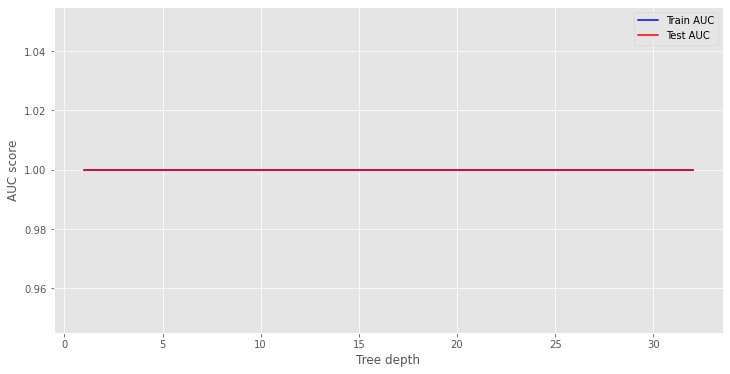

In [31]:
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=10)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

- Current Datasets: Kaggle CC Fraud + Bank Account Fraud
- Distributions, trends, outliers
- Look at Normal (0) vs Fraud (1) class imbalance

# Data Processing

- Nulls
- Apply filters to realize our assumptions
- Standardize variables
- SMOTE to balance target
- Train/Test split


# Features

Types:
- Account related features: account number, card exp date, etc.
- Transaction related features: POS number, transaction time, amount, etc.
- Customer related features: customer number, type of customer, etc.

Feature transformation:
- Date/time variables: weekday or weekend
- Customer spending: average spending amount  + number of transactions
- Risk score: average number of fraud over a certain window 

# Baseline Model

- Logistic Regression 
    - Coefficients, statisitcal importance, explainability
- Decision Tree
    - Classification criteria, feature importance

# Evaluation

- Metrics: ROC (AUC Score), Recall, Confusion Matrix

# Hyperparameter Tuning --> Optimal Model

- Ensemble Methods:
    - Random Forest
    - Boosting

# Conclusion